## Plot results

Assuming that the predictions are in `tweet_data.csv`, this notebook plots the results.

## Importing the Librarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

## Loading the csv file which was generated after 04_prediction.ipynb notebook

In [ ]:
df = pd.read_csv("tweet_data.csv")

## Cleaning and taking the data which are required for plotting

In [ ]:
df = df.assign(keep_uncensored = df['tweet_text'] != df['reworded_2'])
df = df.assign(keep_1 = df['tweet_text'] != df['reworded_1'])
df = df.assign(keep_2 = df['tweet_text'] != df['reworded_2'])

pred_cols = ['predictions_dwmw', 'predictions_fdcl' , 'keep_uncensored',
             'dwmw_predictions_on_reworded_1', 'fdcl_predictions_on_reworded_1', 'keep_1',
             'Dwmw_predictions_on_reworded_2', 'predictions_on_reworded_2', 'keep_2',
             'dwmw_predictions_on_censored', 'fdcl_predictions_on_censored', 'keep_2']
df_pred = df[pred_cols]
df_pred.columns = ['uncensored_dwmw', 'uncensored_fdcl', 'keep_uncensored',
                  'googlenews_dwmw', 'googlenews_fdcl', 'keep_1',
                  'blodgett_dwmw', 'blodgett_fdcl', 'keep_2',
                  'asterisk_dwmw', 'asterisk_fdcl', 'keep_asterisk'
                  ]

In [ ]:
df_pred_dwmw = df_pred[['uncensored_dwmw', 'googlenews_dwmw', 'blodgett_dwmw', 'asterisk_dwmw', 
                        'keep_uncensored', 'keep_1', 'keep_2', 'keep_asterisk']]
df_pred_dwmw.columns = ['Uncensored', 'GoogleNews', 'Blodgett', 'Asterisk',
                        'keep_uncensored', 'keep_gn', 'keep_b', 'keep_asterisk']
df_pred_dwmw = df_pred_dwmw.melt(id_vars=['keep_uncensored', 'keep_gn', 'keep_b', 'keep_asterisk'])
df_pred_dwmw = df_pred_dwmw[
    ((df_pred_dwmw.keep_uncensored) & (df_pred_dwmw.variable=='Uncensored')) |
    ((df_pred_dwmw.keep_gn)         & (df_pred_dwmw.variable=='GoogleNews')) |
    ((df_pred_dwmw.keep_b)          & (df_pred_dwmw.variable=='Blodgett')) |
    ((df_pred_dwmw.keep_asterisk)   & (df_pred_dwmw.variable=='Asterisk')) 
    ]

In [ ]:
df_dwmw_summary = pd.DataFrame(100*df_pred_dwmw.groupby('variable')['value'].value_counts()/df_pred_dwmw.groupby('variable')['value'].count())
df_dwmw_summary.columns = ['percent']
df_dwmw_summary.reset_index(inplace=True)
df_dwmw_summary.columns = ['Replacement', 'Classification', 'Percent']
df_dwmw_summary = df_dwmw_summary.assign(Model = 'DWMW17')
df_dwmw_summary = df_dwmw_summary[(df_dwmw_summary.Classification=='offensive') |
                                  (df_dwmw_summary.Classification=='hate')]
df_dwmw_summary

,Replacement,Classification,Percent,Model
1,Asterisk,offensive,43.636364,DWMW17
2,Asterisk,hate,1.066957,DWMW17
3,Blodgett,offensive,56.646707,DWMW17
5,Blodgett,hate,1.001633,DWMW17
6,GoogleNews,offensive,62.368863,DWMW17
8,GoogleNews,hate,0.828787,DWMW17
9,Uncensored,offensive,85.868263,DWMW17
11,Uncensored,hate,0.958084,DWMW17


In [ ]:
df_pred_fdcl = df_pred[['uncensored_fdcl', 'googlenews_fdcl', 'blodgett_fdcl', 'asterisk_fdcl', 
                        'keep_uncensored', 'keep_1', 'keep_2', 'keep_asterisk']]
df_pred_fdcl.columns = ['Uncensored', 'GoogleNews', 'Blodgett', 'Asterisk',
                        'keep_uncensored', 'keep_gn', 'keep_b', 'keep_asterisk']
df_pred_fdcl = df_pred_fdcl.melt(id_vars=['keep_uncensored', 'keep_gn', 'keep_b', 'keep_asterisk'])
df_pred_fdcl = df_pred_fdcl[
    ((df_pred_fdcl.keep_uncensored) & (df_pred_fdcl.variable=='Uncensored')) |
    ((df_pred_fdcl.keep_gn)         & (df_pred_fdcl.variable=='GoogleNews')) |
    ((df_pred_fdcl.keep_b)          & (df_pred_fdcl.variable=='Blodgett')) |
    ((df_pred_fdcl.keep_asterisk)   & (df_pred_fdcl.variable=='Asterisk')) 
    ]

In [ ]:
df_fdcl_summary = pd.DataFrame(100*df_pred_fdcl.groupby('variable')['value'].value_counts()/df_pred_fdcl.groupby('variable')['value'].count())
df_fdcl_summary.columns = ['percent']
df_fdcl_summary.reset_index(inplace=True)
df_fdcl_summary.columns = ['Replacement', 'Classification', 'Percent']
df_fdcl_summary = df_fdcl_summary.assign(Model = 'FDCL18')
df_fdcl_summary = df_fdcl_summary[(df_fdcl_summary.Classification=='abusive') |
                                  (df_fdcl_summary.Classification=='hateful')]
df_fdcl_summary

,Replacement,Classification,Percent,Model
1,Asterisk,abusive,41.611323,FDCL18
2,Asterisk,hateful,3.277082,FDCL18
5,Blodgett,abusive,22.188351,FDCL18
6,Blodgett,hateful,10.604246,FDCL18
8,GoogleNews,abusive,50.944188,FDCL18
10,GoogleNews,hateful,3.818716,FDCL18
12,Uncensored,abusive,66.227545,FDCL18
14,Uncensored,hateful,16.526946,FDCL18


## Taking out data from the paper and storing in a csv file

In [ ]:
ORIGINAL = StringIO("""Replacement;Classification;Percent;Model
    Uncensored;abusive;67.77;FDCL18
    Uncensored;hateful;27.89;FDCL18
    Uncensored;offensive;96.18;DWMW17
    Uncensored;hate;2.46;DWMW17
    Censored;abusive;51.04;FDCL18
    Censored;hateful;5.496;FDCL18
    Censored;offensive;64.07;DWMW17
    Censored;hate;1.93;DWMW17
    """)

df_orig_summary = pd.read_csv(ORIGINAL, sep=";")
df_orig_summary

,Replacement,Classification,Percent,Model
0,Uncensored,abusive,67.770,FDCL18
1,Uncensored,hateful,27.890,FDCL18
2,Uncensored,offensive,96.180,DWMW17
3,Uncensored,hate,2.460,DWMW17
4,Censored,abusive,51.040,FDCL18
5,Censored,hateful,5.496,FDCL18
6,Censored,offensive,64.070,DWMW17
7,Censored,hate,1.930,DWMW17


In [ ]:
df_summary = pd.concat([df_fdcl_summary,
                        df_dwmw_summary])

## Plotting Original results from the paper

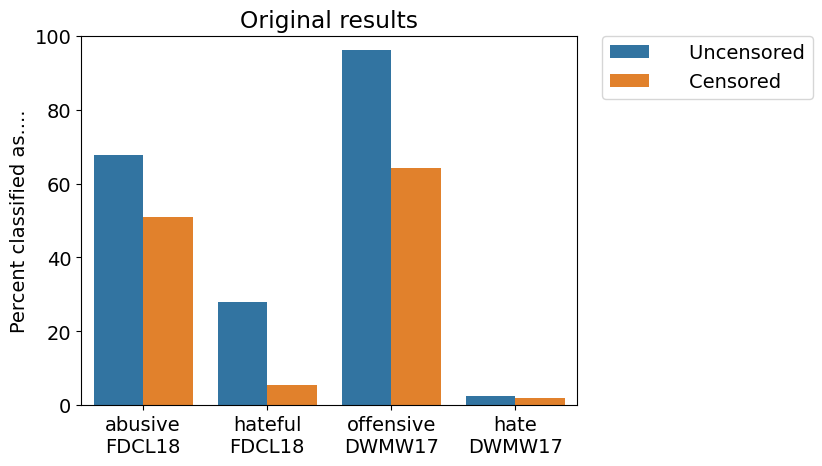

In [ ]:
plt.title('Original results');
sns.barplot(x=df_orig_summary.Classification +  '\n' + df_orig_summary.Model, 
            y=df_orig_summary.Percent, hue=df_orig_summary.Replacement);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.ylabel("Percent classified as....");
plt.ylim((0,100));
plt.savefig('original.pdf');

## Plotting our results

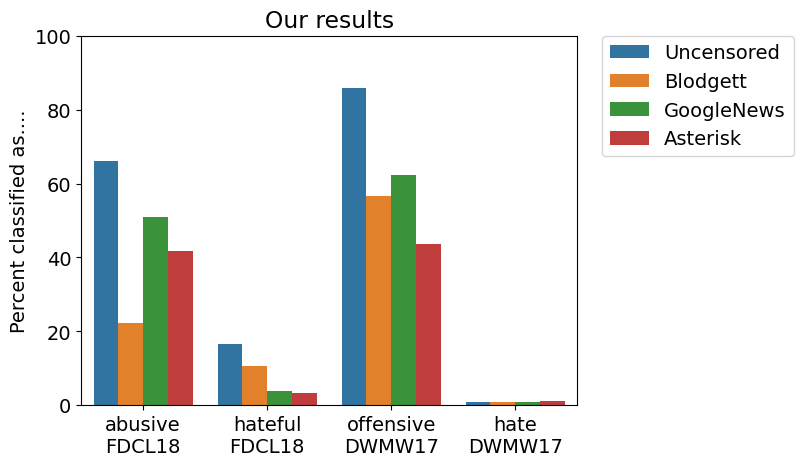

In [ ]:
sns.barplot(x=df_summary.Classification +  '\n' + df_summary.Model, 
            y=df_summary.Percent, hue=df_summary.Replacement,
            hue_order=['Uncensored', 'Blodgett', 'GoogleNews', 'Asterisk']);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.ylabel("Percent classified as....");
plt.title('Our results');
plt.ylim((0,100));
plt.savefig('ours.pdf');